In [1]:
import pandas as pd
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import geopandas as gpd
import h5py
from matplotlib.colors import from_levels_and_colors
import matplotlib


/home/p6001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
#grid
grid_CMAQ=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')
lon=np.array(grid_CMAQ.variables['LON'][0,0,2:101,2:180])
lat=np.array(grid_CMAQ.variables['LAT'][0,0,2:101,2:180])

In [50]:
dic_RIO={}

dic_RIO={'2015_life':'/media/sf_Share/LifeIP_results_RIO/LifeIP_results_RIO/PM10/2015_RIO_output_daily_average/rio_pm10_da_clc12_47x47_20150101-20151231.h5',
         '2017_orig':'/media/sf_Share/RIO_results_SK_2016-2017-2018/RIO_output/pm10_orig/rio_pm10_da_clc12_47x47_20170101-20171231.h5',
         '2017_res_em':'/media/sf_Share/RIO_results_SK_2016-2017-2018/RIO_output/pm10_ResEmiss/rio_pm10_da_ResEmiss_47x47_20170101-20171231.h5',
         '2016_optim':'/media/sf_Share/RIO_results_SK_2016-2017-2018/RIO_output/pm10_re_optim_SK2017/rio_pm10_da_clc12_47x47_20160101-20161231.h5',
         '2017_optim':'/media/sf_Share/RIO_results_SK_2016-2017-2018/RIO_output/pm10_re_optim_SK2017/rio_pm10_da_clc12_47x47_20170101-20171231.h5',
         '2018_optim':'/media/sf_Share/RIO_results_SK_2016-2017-2018/RIO_output/pm10_re_optim_SK2017/rio_pm10_da_clc12_47x47_20180101-20181231.h5'
                }


In [52]:
rio_daily={}
rio_ann={}
grid=gpd.read_file('/media/sf_Share/LifeIP_results_RIO/grid/grid/CAMx_d02.shp')

for case in dic_RIO:
    file=h5py.File(dic_RIO[case],'r')
    
    priecinky={}
    for i in list(file.keys()):
        b=list(file[i])
        priecinky[i]=b
    
    data={}   
    keys=priecinky.keys()
    for i in keys:
        for j in priecinky[i]:
            atr=file['{0}/{1}'.format(i,j)].attrs.keys()
            data['{0}/{1}'.format(i,j)]=file['{0}/{1}'.format(i,j)]
            
    
    rio_daily[case]=np.array(data['grid/value'][:])
    
    if not case.startswith('2016'):
       rio_daily[case]=np.reshape(rio_daily[case],(101,179,365))[1:100,1:]
    else:
       rio_daily[case]=np.reshape(rio_daily[case],(101,179,366))[1:100,1:]   
    
    #rio annual average
    rio_ann[case]=np.empty((99,178))
    rio_ann[case]=np.average(rio_daily[case][:,:,:], axis=2)  
    

In [49]:
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=48.7,lon_0=19.7,width=425780,height=216351,resolution='h')
koef=netCDF4.Dataset('/data/transboundary/em_koef')['koef'][2:101,2:180]
facSLO=(1-koef)    

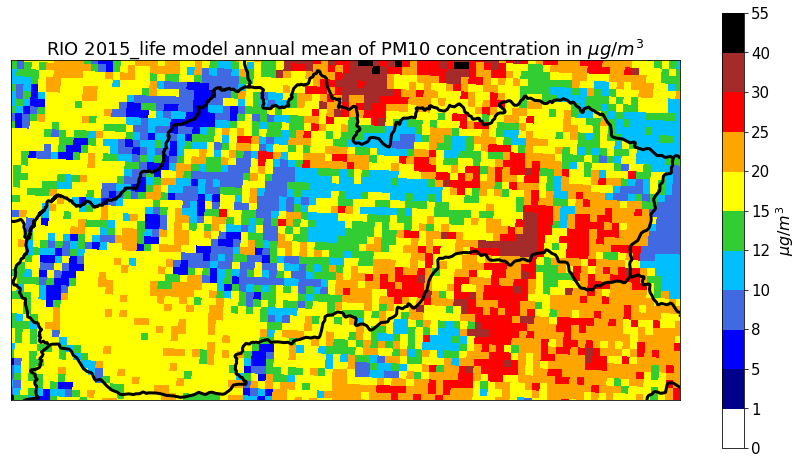

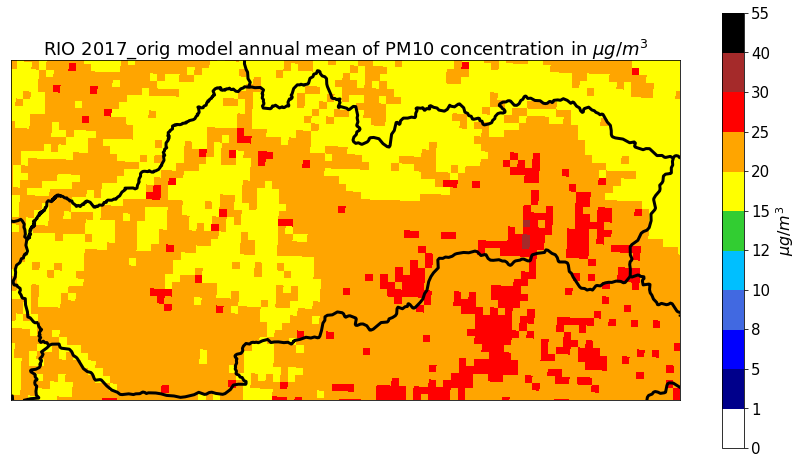

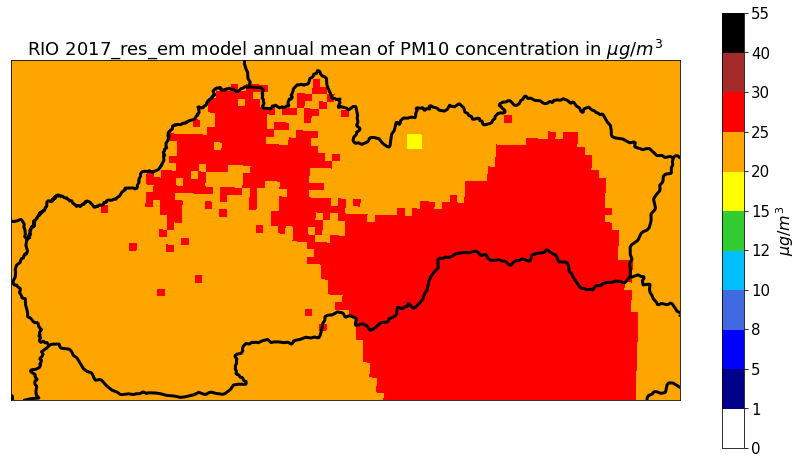

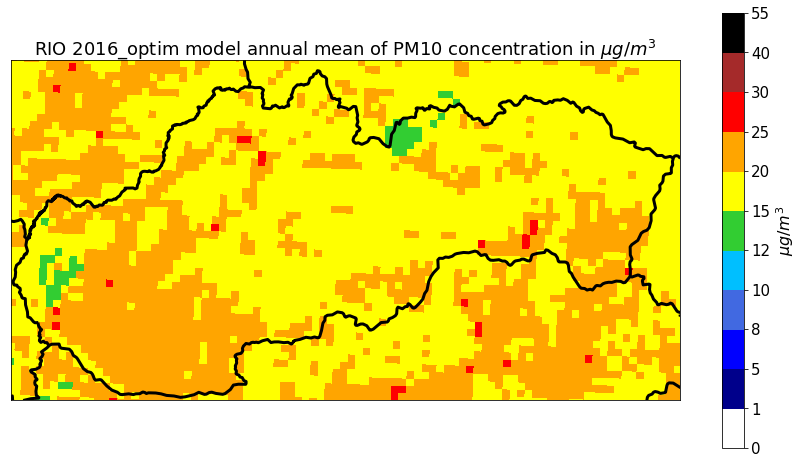

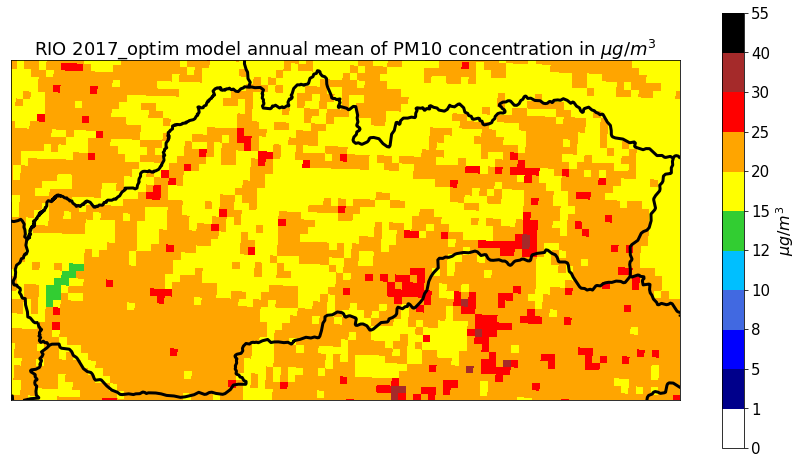

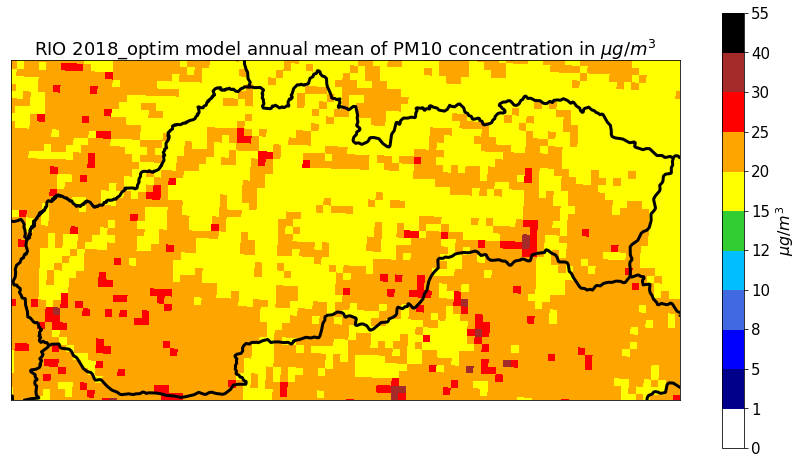

In [53]:
plt.rcParams['figure.figsize'] = 15,8
plt.rcParams.update({'font.size': 15})
levels=[0,1,5,8,10,12,15,20,25,30,40,55]
colors_m=['w','darkblue','blue','royalblue','deepskyblue','limegreen','yellow','orange','red','brown','black']

cmap, norm = from_levels_and_colors(levels,colors_m)

for case in dic_RIO:


    mapb.drawcountries(linewidth=3)
    b=mapb.pcolormesh(lon,lat,rio_ann[case],latlon=True,cmap=cmap, norm=norm)

    cb=plt.colorbar(b,label='$\mu g /m^3$')
    cb.set_ticks(levels)
    font = matplotlib.font_manager.FontProperties( style='italic', size=16)
    cb.ax.yaxis.label.set_font_properties(font)
    plt.title('RIO {0} model annual mean of PM10 concentration in $\mu g /m^3$'.format(case))

    #plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_CMAQ_PM10_por', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()